THE IDEA OF INTERGRATING  CLASSICAL MACHINE LEARNING WITH QUANTUM MACHINE LEARNING COMES FROM A DEEPER PART OF SCIENTIFIC
UNDERSTANDING OF QUANTUM STATE SPACES AND LINEAR ENTANGLEMENTS.THE FOLLOWING NOTEBOOK EMPHASIZES ON HOW TO MERGE PYTORCH
AND QISKIT (I.E. CLASSICAL MACHINE LEARNING AND QUANTUM MACHINE LEARNING)

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

# For Quantum Ml
import qiskit
from qiskit import QuantumCircuit,QuantumRegister
from qiskit.circuit import Parameter,ParameterVector
from qiskit.utils import algorithm_globals as alg
from qiskit.circuit.library import ZZFeatureMap,RealAmplitudes
from qiskit_machine_learning.neural_networks import SamplerQNN,EstimatorQNN


In [2]:
# Lets load a Dataset
df = pd.read_csv("C:\\Datasets\\pcos\\PCOS_infertility.csv")

In [3]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [4]:
df.isnull().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
AMH(ng/mL)                0
dtype: int64

In [5]:
df.shape

(541, 6)

In [6]:
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'],
      dtype='object')

In [7]:
df.drop(['Patient File No.','Sl. No'],axis=1,inplace=True)

In [8]:
df.columns

Index(['PCOS (Y/N)', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
       'AMH(ng/mL)'],
      dtype='object')

In [9]:
df.describe()

,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL)
count,541.000000,541.000000,541.000000
mean,0.327172,664.549235,238.229518
std,0.469615,3348.920576,1603.826221
min,0.000000,1.300000,0.110417
25%,0.000000,1.990000,1.990000
50%,0.000000,20.000000,1.990000
75%,1.000000,297.210000,97.630000
max,1.000000,32460.970000,25000.000000


In [10]:
import random

In [11]:
# Some Basic Plotting
def plot_histogram(column,df=df):
    color = random.choice(['black','blue','red'])
    fig=plt.figure(figsize=(10,8))
    sns.histplot(x=column,data=df,color=color)
    plt.xlabel(column)
    plt.ylabel("total")
    plt.title(f"The Histogram Plot for {column}")
    plt.show()

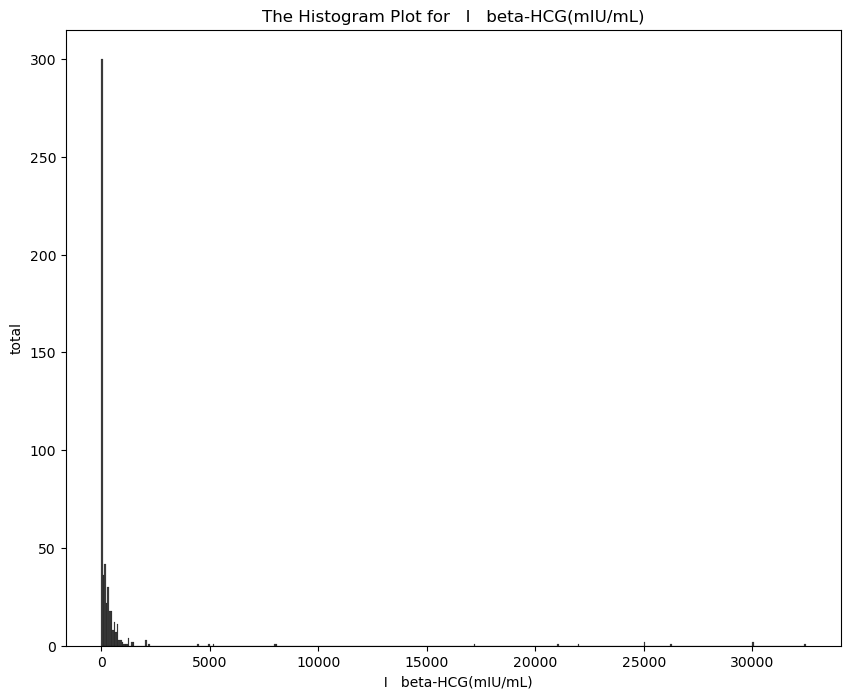

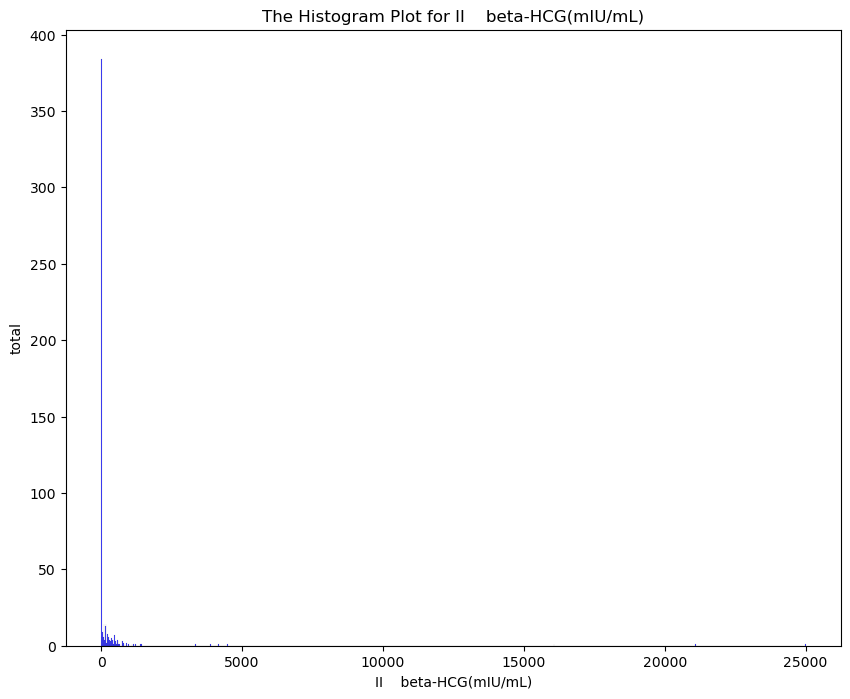

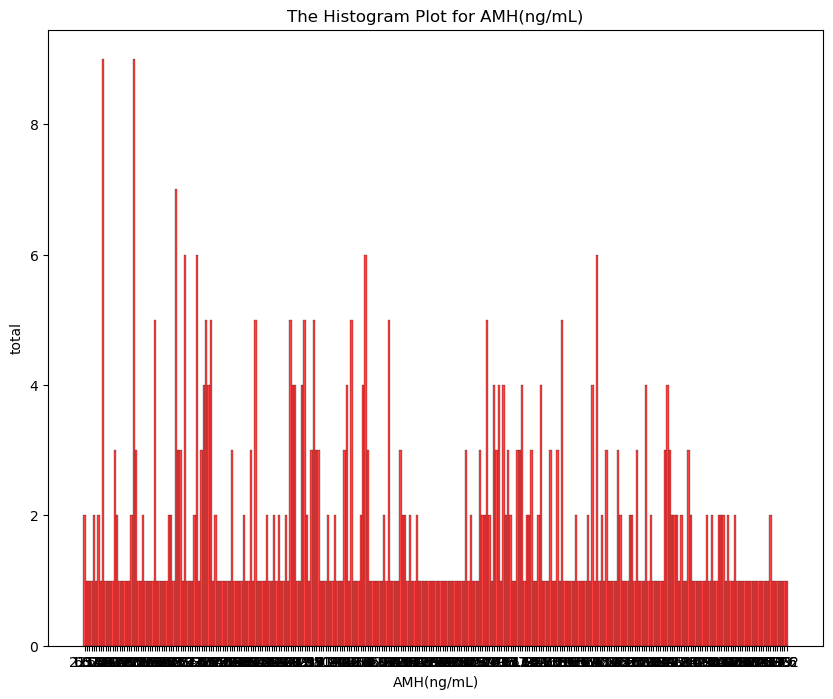

In [12]:
for column in df.columns:
    if column in ['PCOS (Y/N)']:
        pass
    else :
        plot_histogram(column=column)

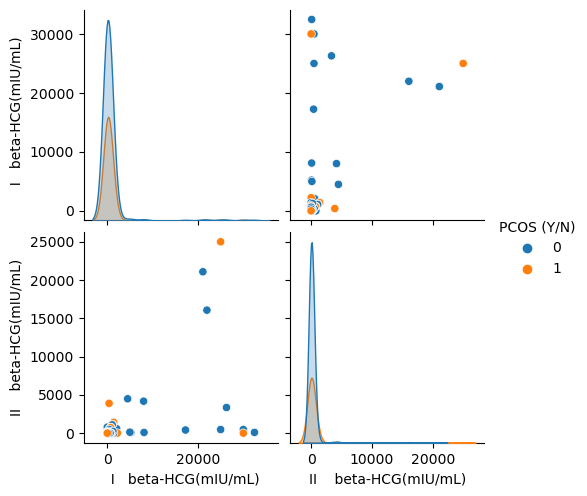

In [13]:
# Pairplot 
sns.pairplot(df,hue='PCOS (Y/N)')
plt.show()

# DATA PREPROCESSING 

In [14]:
X = df.drop(['PCOS (Y/N)','AMH(ng/mL)'],axis=1).values
y = df['PCOS (Y/N)'].values

In [15]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [16]:
X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.FloatTensor).reshape(-1,1)

In [17]:
X.shape

torch.Size([541, 2])

In [18]:
y.shape

torch.Size([541, 1])

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [20]:
print(f"The Shape of our feature  training data is {X_train.shape},label training data is {y_train.shape}")
print(f"The Shape of our feature  testing data is {X_test.shape},label testing data is {y_test.shape}")

The Shape of our feature  training data is torch.Size([432, 2]),label training data is torch.Size([432, 1])
The Shape of our feature  testing data is torch.Size([109, 2]),label testing data is torch.Size([109, 1])


# QUANTUM MACHINE LEARNING

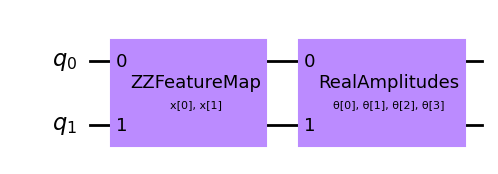

In [21]:
# Define a Quantum State Space or Quantum Circuit
qc = QuantumCircuit(2)
feature_map = ZZFeatureMap(2)
ansatz = RealAmplitudes(2,entanglement='linear',reps=1)
qc.compose(feature_map,inplace=True)
qc.compose(ansatz,inplace=True)
qc.draw("mpl")

In [22]:
# Defining an Estimator QNN
qnn = EstimatorQNN(circuit=qc,input_params=feature_map.parameters,weight_params=ansatz.parameters)

In [23]:
qnn

In [24]:
# Create initial weight
alg.random_seed = 2023
initial_weights = 0.1*(2*alg.random.random(qnn.num_weights))
print(f"The Initial Weights for Our Estimator QNN are :{initial_weights}")

The Initial Weights for Our Estimator QNN are :[0.01761089 0.04408801 0.02263411 0.08859337]


# HYBRID QNN : USING TORCH CONNECTOR 

In [25]:
# I would like to show an example of A pytorch neural network
class RandomNN(nn.Module):
    def __init__(self,param_x,param_y,param_z):
        super().__init__()
        self.param_x = param_x
        self.param_y = param_y
        self.param_z = param_z
        self.linear = nn.Linear(param_x,param_y)
    def forward(self,param):
        param = self.linear(param)
        return param
    pass
"""In The Above Model if we were to train and test our model we would do so by First instantiating our model
model= RandomNN(param_x,param_y,param_z)

,filling in
our parameters
and The In Training and Testing the model we would be asked to choose and Optimizer and a Loss function.
The Optimizer choice depends ,can be either Adam,SGD,Adagrad,AdaDelta ...the list goes on .
A point to note is that while we can choose any optimizer ,the loss function is exclusive to the problem 
that we are trying to solve,Classification Requires us to use the CrossEntropyLoss while Regression accepts MSE Loss

For Our case We will use the LBFGS optimizer ,

# The code for this  is 
optimizer = torch.optim.LBFGS
criterion = nn.CrossEntropyLoss()


"""

'In The Above Model if we were to train and test our model we would do so by First instantiating our model\nmodel= RandomNN(param_x,param_y,param_z)\n\n,filling in\nour parameters\nand The In Training and Testing the model we would be asked to choose and Optimizer and a Loss function.\nThe Optimizer choice depends ,can be either Adam,SGD,Adagrad,AdaDelta ...the list goes on .\nA point to note is that while we can choose any optimizer ,the loss function is exclusive to the problem \nthat we are trying to solve,Classification Requires us to use the CrossEntropyLoss while Regression accepts MSE Loss\n\nFor Our case We will use the LBFGS optimizer ,\n\n# The code for this  is \noptimizer = torch.optim.LBFGS\ncriterion = nn.CrossEntropyLoss()\n\n\n'

In [26]:
X_train.shape

torch.Size([432, 2])

In [27]:
class PCOS(nn.Module):
    def __init__(self,input_dim=2,hidden_dim=8,output_dim=1):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.linear1 = nn.Linear(input_dim,hidden_dim)
        self.linear2 = nn.Linear(hidden_dim ,output_dim)
    def forward(self,x:torch.Tensor):
        x = self.linear1(x)
        x = self.linear2(x)
        return x

In [28]:
pcos = PCOS()

In [29]:
pcos.forward(X_train[:3])

tensor([[-0.4090],
        [-0.4022],
        [-0.4090]], grad_fn=<AddmmBackward0>)

In [30]:
# I will use TorchConnector and create a Hybrid QNN model
from qiskit_machine_learning.connectors import TorchConnector

In [31]:
model =TorchConnector(qnn,initial_weights=initial_weights)

In [32]:
model(X_train[:3])

tensor([[0.6566],
        [0.7988],
        [0.7241]], grad_fn=<_TorchNNFunctionBackward>)

# TRAINING AND TESTING LOOP FOR OUR HYBRID MODEL

In [33]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = nn.MSELoss()

In [34]:
epochs = 100
for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = criterion(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    with torch.no_grad():
        y_pred = model.forward(X_test)
        test_loss = criterion(y_pred,y_test)
        if epoch% 10 == 0 :
            print(f"Epoch{epoch}|Training Loss {loss}|Testing Loss{test_loss}")

Epoch0|Training Loss 0.33138859272003174|Testing Loss0.3374851942062378
Epoch10|Training Loss 0.3296414613723755|Testing Loss0.33560121059417725
Epoch20|Training Loss 0.32759803533554077|Testing Loss0.333395779132843
Epoch30|Training Loss 0.32521742582321167|Testing Loss0.33082640171051025
Epoch40|Training Loss 0.3224681317806244|Testing Loss0.3278602957725525
Epoch50|Training Loss 0.3193321228027344|Testing Loss0.3244789242744446


KeyboardInterrupt: 

THE TORCH CONNECTOR MODEL PRESENTS A NOVEL WAY OF LOOKING AT DATA AND INDEED ,THE HYBRID ESTIMATOR QNN MODEL LEARNS 
COMPARATIVELY SLOWER DUE TO THE QUANTUM STATE SPACES 

# THE END OF THE NOTEBOOK THANK YOU